# Milestone 4. Progress report 

Link to GitHub repo:  https://github.com/navydhara79/cs418-sp23-DarthVader/tree/master

## Changes: 

- There have not been any significant changes to report
- Our aim has remained the same since the last check-in and we are working on progress towards sour aim.

## Data: 

- We have decided on working with the 2015 earthquake open portal data. 
- This is a very large, unprocessed data of 11 earthquake affected districts,  762,106 buildings and 3,677,173 individuals. There are 38 features in total in 3 datasets, like building’s age, # floors, use etc.
- The data is raw and noisy with missing values and poses challenges for data cleaning. 

The three datasets we are working on are described below: 



1.  csv_building_damage_assessment: This dataset contains information about the extent of damage to buildings caused by the earthquake. It includes columns such as building ID, building location, building type, degree of damage (e.g. destroyed, severely damaged, moderately damaged, lightly damaged), and the estimated cost of repair. This dataset can be used to analyze the overall impact of the earthquake on buildings in different regions, as well as to explore factors that may have influenced the degree of damage to different types of buildings.
2.  csv_building_structure: This dataset contains information about the structural characteristics of buildings, such as the number of stories, construction materials, and age. It also includes information about the seismic hazard zone of the building, based on the Nepal Building Code. This dataset can be used to analyze the relationship between building structure and the degree of damage caused by the earthquake, as well as to identify factors that may contribute to the vulnerability of certain types of buildings
3. csv_building_ownership_and_use: This dataset contains information about the ownership and use of buildings, such as whether the building is owned by an individual or an organization, and whether it is used for residential or non-residential purposes. It also includes information about the occupancy status of the building at the time of the earthquake. This dataset can be used to explore the relationship between building ownership, use, and occupancy status, and the degree of damage caused by the earthquake.

The details of the data have been displayed below

In [ ]:
import copy
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from scipy.stats import iqr
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from fuzzywuzzy import fuzz

In [ ]:
cd "C:\Users\dlais\Downloads\drive-download-20230402T173743Z-001"

C:\Users\dlais\Downloads\drive-download-20230402T173743Z-001


In [ ]:
df_damage = pd.read_csv("CSV_BU~1.CSV", low_memory=False)
df_structure = pd.read_csv('csv_building_structure.csv', low_memory=False)
df_own = pd.read_csv('CSV_BU~2.CSV', low_memory=False)

In [ ]:
df_damage.head()

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,area_assesed,damage_grade,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),NaN,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(<1/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,Moderate-Heavy-(>2/3),NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 3,Major repair,0.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Exterior,Grade 5,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,NaN,Insignificant/light-(1/3-2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 2,Minor repair,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Mod

In [ ]:
df_own.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


## Problem: 
- Classifying the damage of a building/property is quite important as it will help in multiple areas like compensations, support and also for officers to set perimeters around property for safeguarding others. 

- We propose to build a data science project, to classify the damage into one of the three classes, using data science methods. 

- The project focuses on Data Cleaning, Exploratory data analysis, application of some basic algorithms to classify the damage. 

- This problem is important for a number of reasons. Firstly, it has significant implications for individuals and communities affected by the earthquake. Accurately assessing the extent of damage to buildings/properties can help decision-makers to allocate resources effectively, to support the recovery efforts and provide assistance to those who need it most. Additionally, it can help to mitigate risks for the wider community by identifying buildings/properties that pose a safety risk.

- We chose this problem because it is a critical issue in the aftermath of natural disasters, particularly in regions that are vulnerable to earthquakes. There is often a lack of data-driven methods for assessing the extent of damage to buildings/properties, which can lead to inefficiencies and inconsistencies in decision-making around support and compensation. By leveraging data science methods to classify the damage of buildings/properties, we aim to provide a more accurate and efficient way of assessing the impact of natural disasters on built environments.


## Research questions: 



1.   **Idea 1 - Navyadhara**: Can we predict the level of damage caused by the 2015 Nepal earthquake to buildings based on their ownership, use, and structure characteristics?



2.  **Idea 2 - Sandeep**: Is there a relationship between the demographic characteristics of households in the areas affected by the 2015 Nepal earthquake and their vulnerability to the earthquake?

## Data cleaning:

In [ ]:
df_damage.head()

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,area_assesed,damage_grade,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),NaN,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(<1/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,Moderate-Heavy-(>2/3),NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 3,Major repair,0.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Exterior,Grade 5,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,NaN,Insignificant/light-(1/3-2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 2,Minor repair,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Mod

In [ ]:
df_structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
df_own.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Initial size of Damage data:", df_damage.size)
print("Initial size of structure data:", df_structure.size)
print("Initial size of ownership_and_use data:", df_own.size)

Initial size of Damage data: 60206374
Initial size of structure data: 23625286
Initial size of ownership_and_use data: 12955802


Step-1: Dropping the unnecessary fields

In [ ]:
needed_damage = ['building_id','damage_grade']
unnecasry_structure = ['condition_post_eq', 'technical_solution_proposed']

df_damage = df_damage[needed_damage]
df_structure = df_structure.drop(unnecasry_structure, axis = 1)

In [ ]:
df_damage.damage_grade.value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

Step-2: Merging the dataframes into single dataframe for future use

In [ ]:
df_merged = df_damage.merge(df_structure,on='building_id').merge(df_own,on='building_id')

In [ ]:
df_merged= df_merged.replace('None',None)

In [ ]:
df_merged.shape

(762106, 46)

Step-3: Checking for null values

In [ ]:
null_cols = [(col, df_merged[col].isnull().sum()) for col in df_merged.columns if df_merged[col].isnull().sum()>0]

null_cols

[('damage_grade_x', 12),
 ('position', 1),
 ('plan_configuration', 1),
 ('damage_grade_y', 12),
 ('count_families', 2),
 ('has_secondary_use', 10)]

There are null values in 'damage_grade' column. It would be a good idea to perform label encoding before proceeding to null value cleaning. 

Step-4: Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
original_data = df_merged
masked_data = df_merged.isnull()

In [ ]:
df_merged = df_merged.astype(str).apply(le.fit_transform)
df_merged = df_merged.where(~masked_data, original_data)

In [ ]:
df_merged.head()

,building_id,damage_grade_x,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade_y,district_id_y,vdcmun_id_y,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,2,0,6,55,0,1,164,1196,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,1,0,0,0,2,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,4,0,6,55,0,1,52,1370,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,1,0,0,0,4,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,6,55,0,1,87,1409,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,0,0,0,0,1,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,6,55,0,1,87,1253,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,0,0,0,0,1,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,6,55,0,1,99,1245,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,0,0,0,0,0,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0


The damage_grade column is very important because of its characteristic to effect

Step-5:  Dealing with null values

In [ ]:
df_merged = df_merged.dropna()

In [ ]:
# Get a list of columns that only have null values
null_cols = [(col, df_merged[col].isnull().sum()) for col in df_merged.columns if df_merged[col].isnull().sum()>0]

null_cols

[]

In [ ]:
df_merged.shape

(762093, 46)

Upon cleaning the dataset, we have above 726k rows of data, which is sufficient for building models

Step-6: Removing outliers

In [ ]:
import numpy as np

from scipy import stats

numeric_cols = df_merged.select_dtypes(include=np.number)


z_scores = np.abs(stats.zscore(numeric_cols))
threshold = 3
outliers = (z_scores > threshold)
outliers_per_column = np.sum(outliers, axis=0)
columns_with_outliers = numeric_cols.columns[outliers_per_column > 0].tolist()


In [ ]:
print(columns_with_outliers)

['count_floors_pre_eq', 'count_floors_post_eq', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'ground_floor_type', 'has_superstructure_adobe_mud', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']


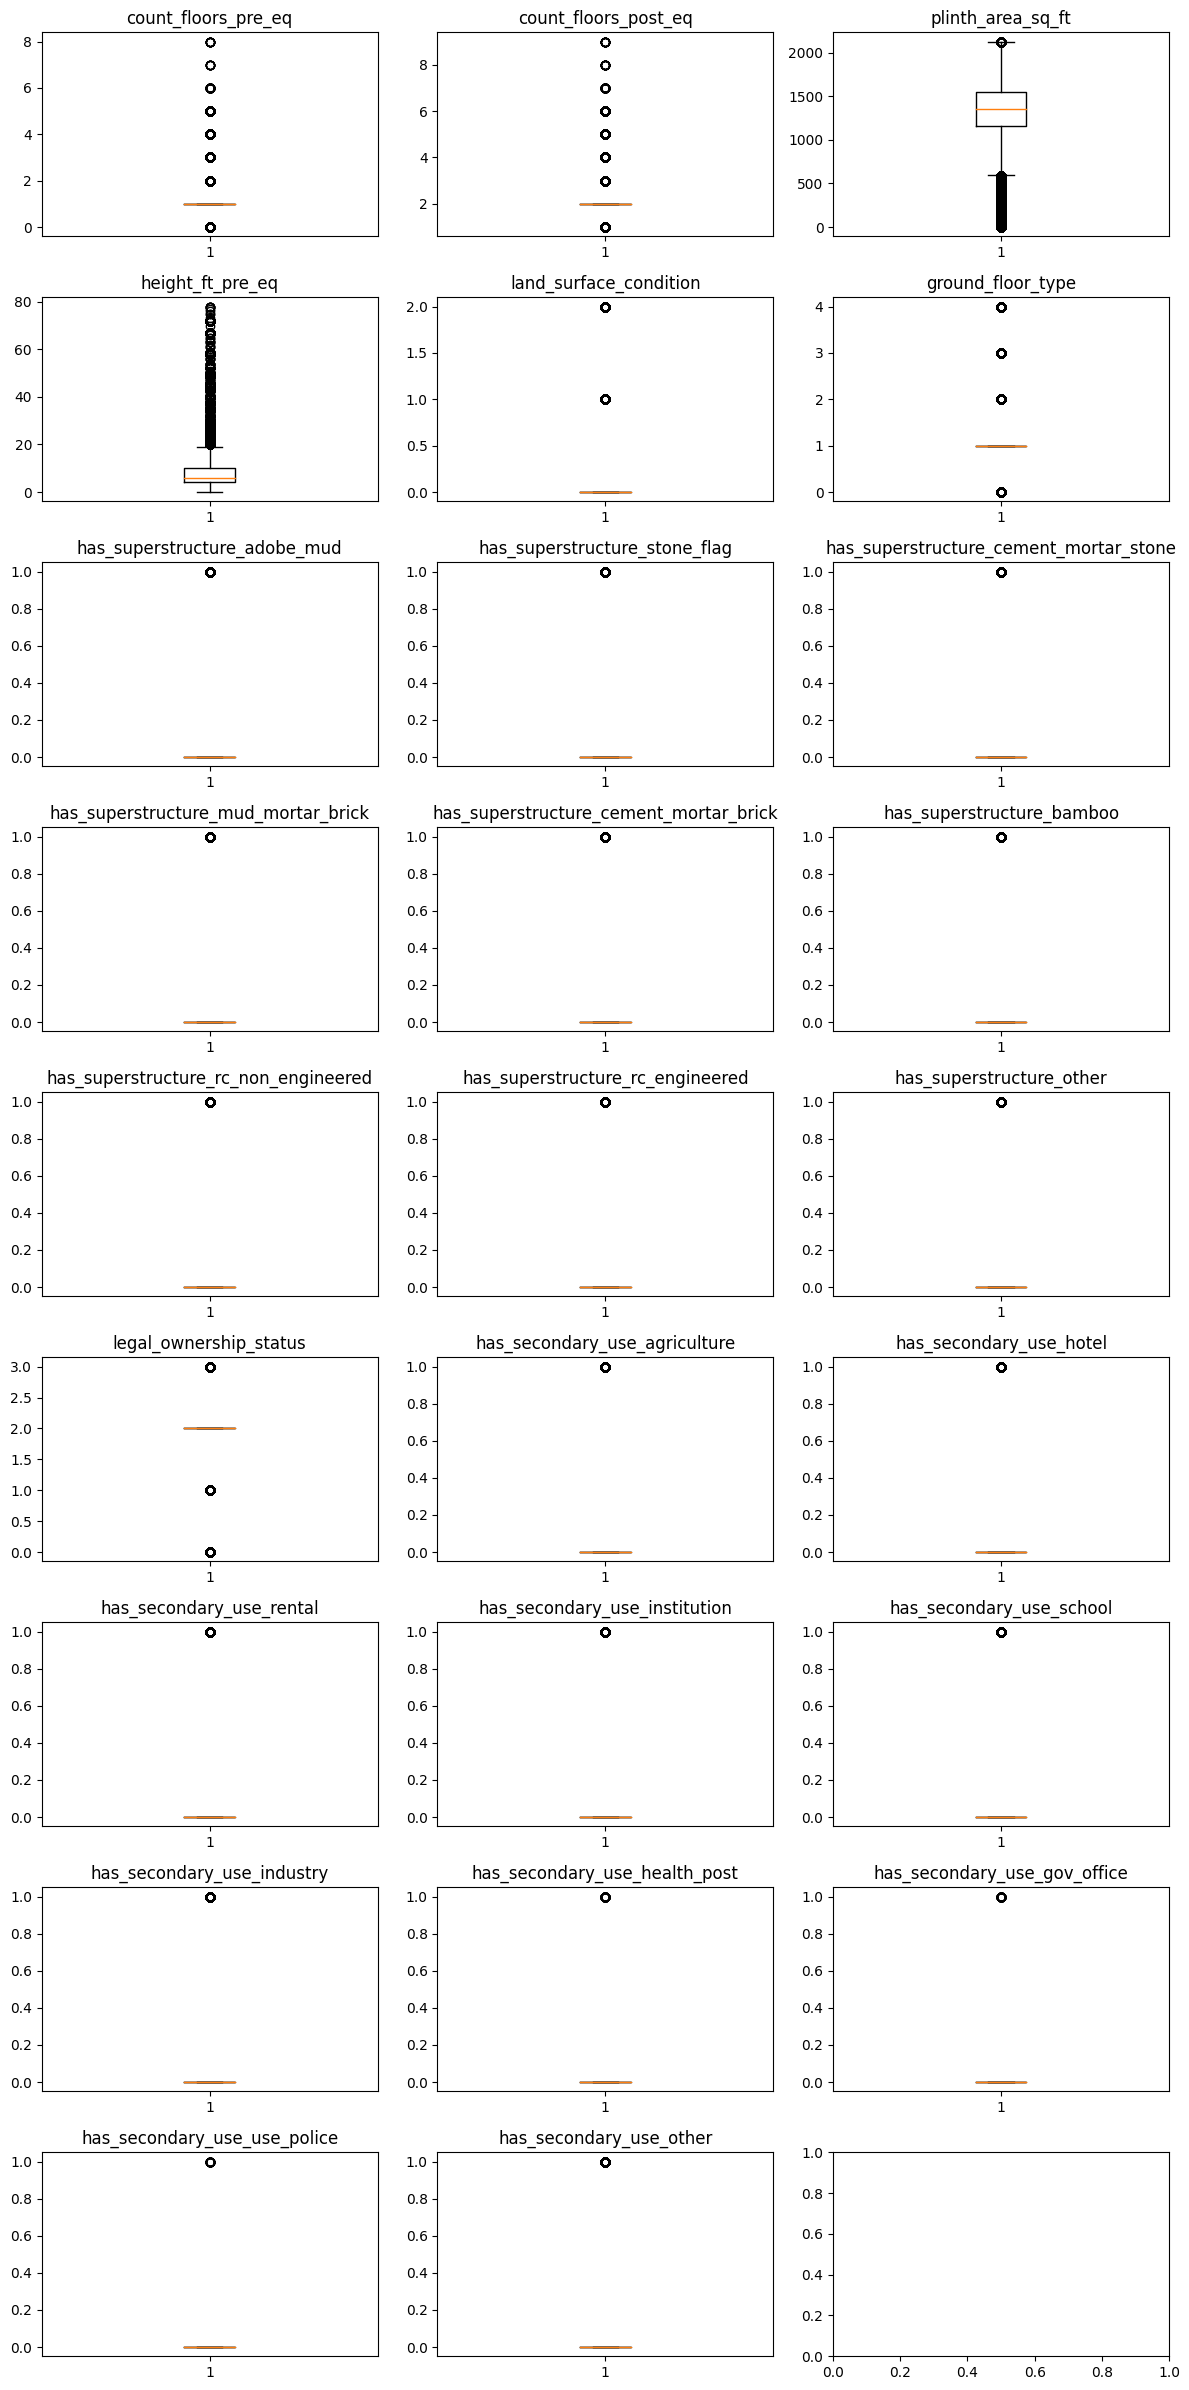

In [ ]:

cols = columns_with_outliers

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(12, 24))

for i, cols in enumerate(cols):
    # print(i, col)
    row = i // 3
    col = i % 3
    axs[row, col].boxplot(df_merged[cols])
    axs[row, col].set_title(cols)

plt.tight_layout()
plt.show()


Now, we use IQR to remove the outliers

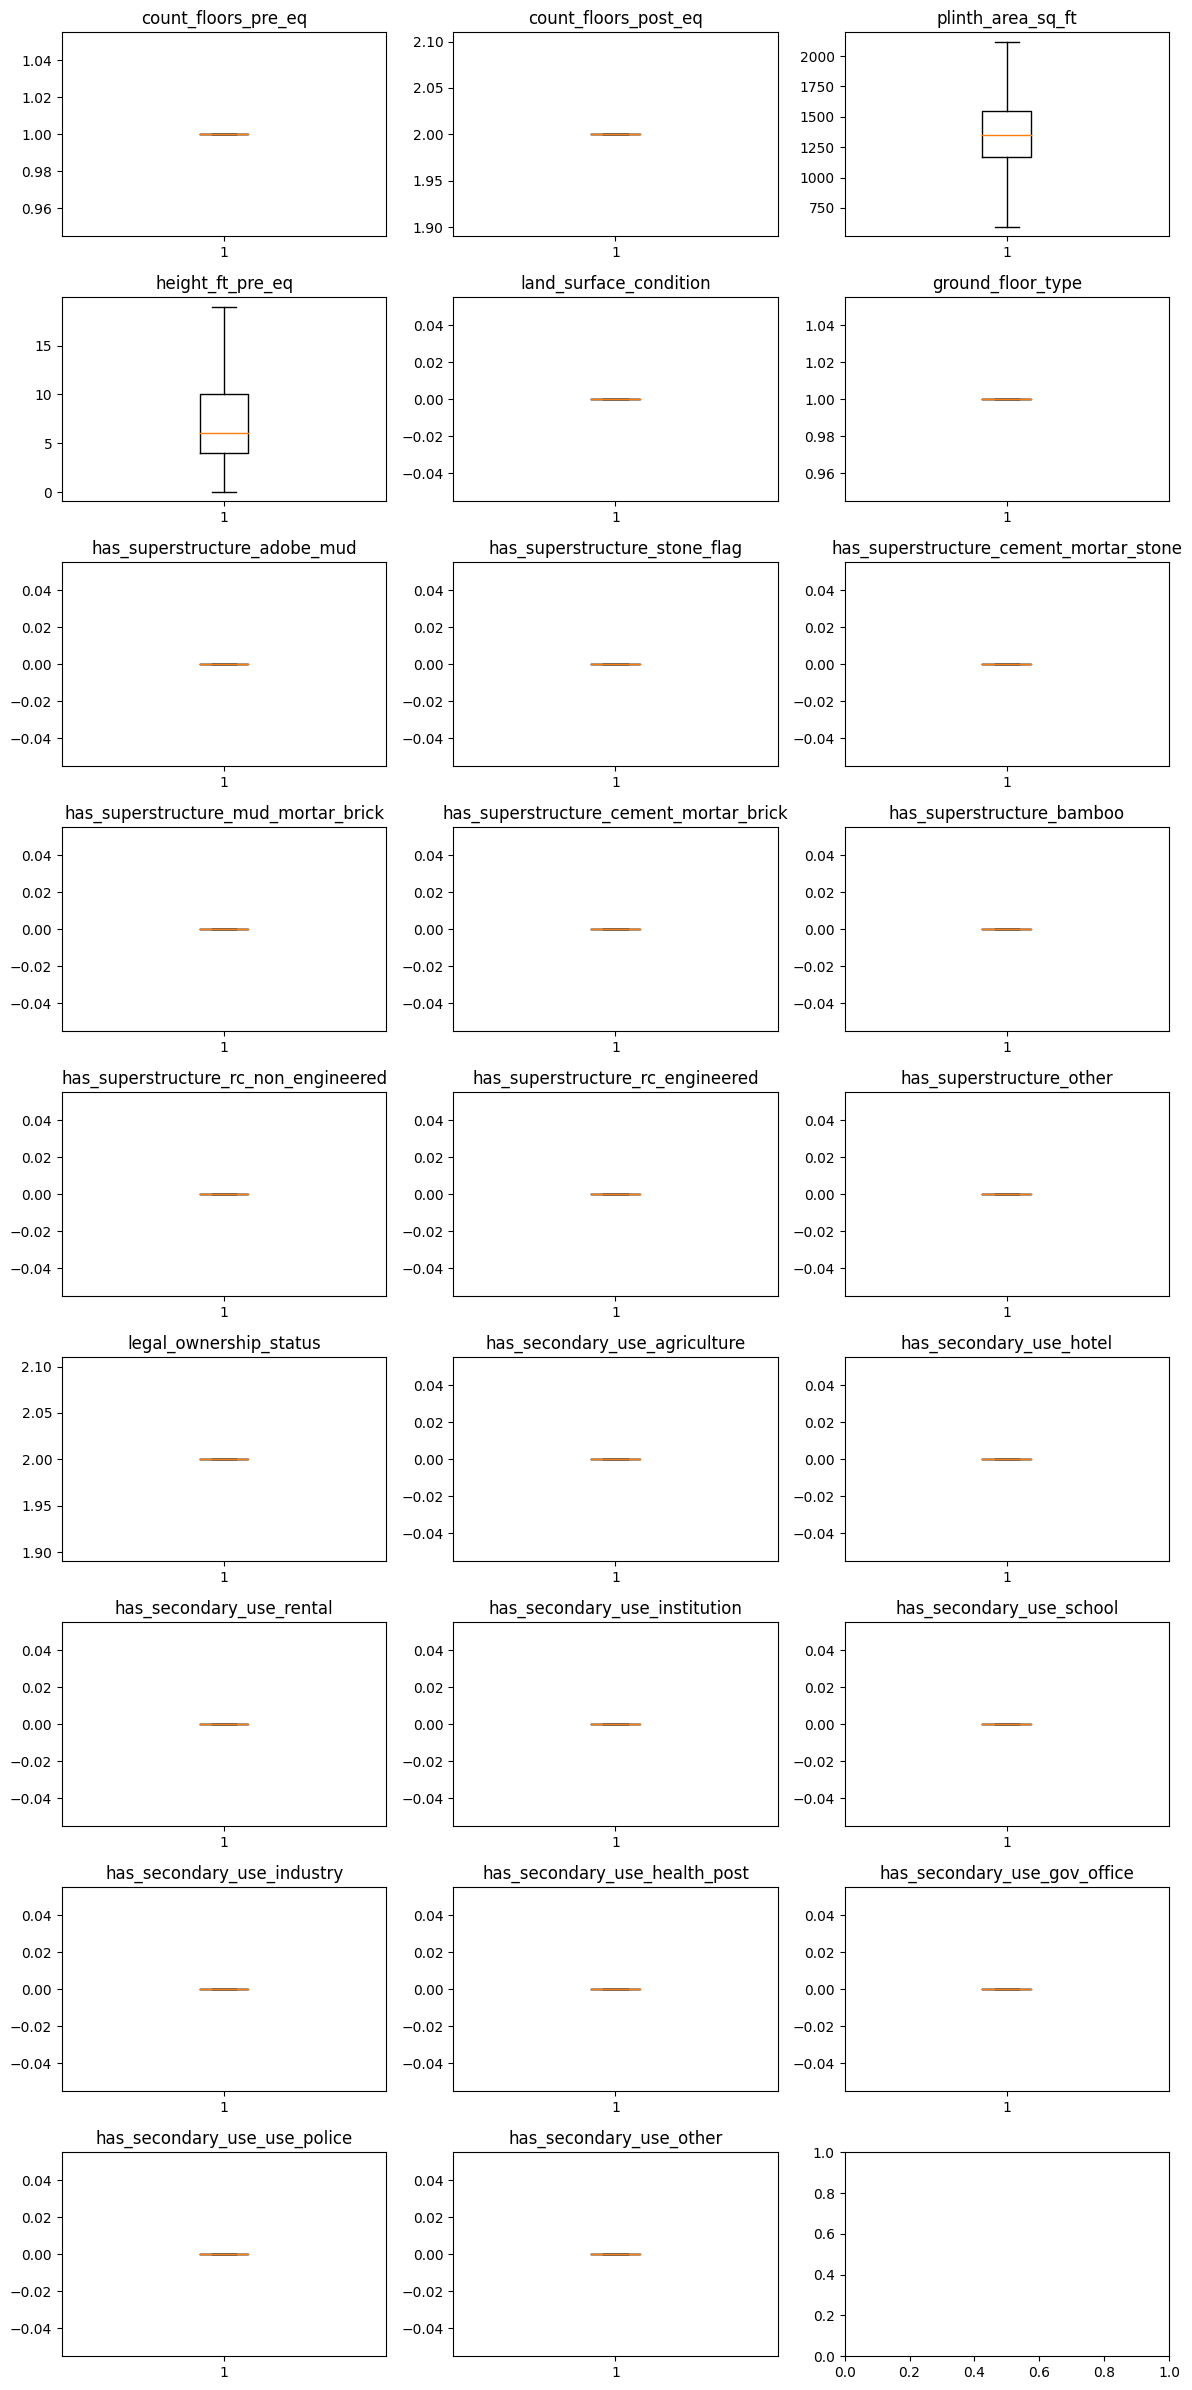

In [ ]:
from scipy.stats import iqr
outliers = columns_with_outliers

for col in outliers:    
  above = df_merged[col].quantile(0.75)+1.5*iqr(df_merged[col])
  below = df_merged[col].quantile(0.25)-1.5*iqr(df_merged[col])
  df_merged[col]=df_merged[col].mask(df_merged[col]>above, above)
  df_merged[col]=df_merged[col].mask(df_merged[col]<below, below)
  
  
cols = columns_with_outliers

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(12, 24))

for i, cols in enumerate(cols):
    # print(i, col)
    row = i // 3
    col = i % 3
    axs[row, col].boxplot(df_merged[cols])
    axs[row, col].set_title(cols)

plt.tight_layout()
plt.show()

Step-7: Saving the cleaned CSV

In [ ]:
df_merged.to_csv('merged_data.csv', index = False)

In [ ]:
df = pd.read_csv('merged_data.csv')

<h2>Exploratory Data Analysis</h2>

In [ ]:
df = df.drop(['damage_grade_y', 'district_id_y','vdcmun_id_y','ward_id_y'],axis = 1) 

In [ ]:
df.columns

Index(['building_id', 'damage_grade_x', 'district_id_x', 'vdcmun_id_x',
       'ward_id_x', 'count_floors_pre_eq', 'count_floors_post_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'height_ft_post_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_us

Plot 1: Age of the building
- Table used: Structure of buildings
- By: Navyadhara

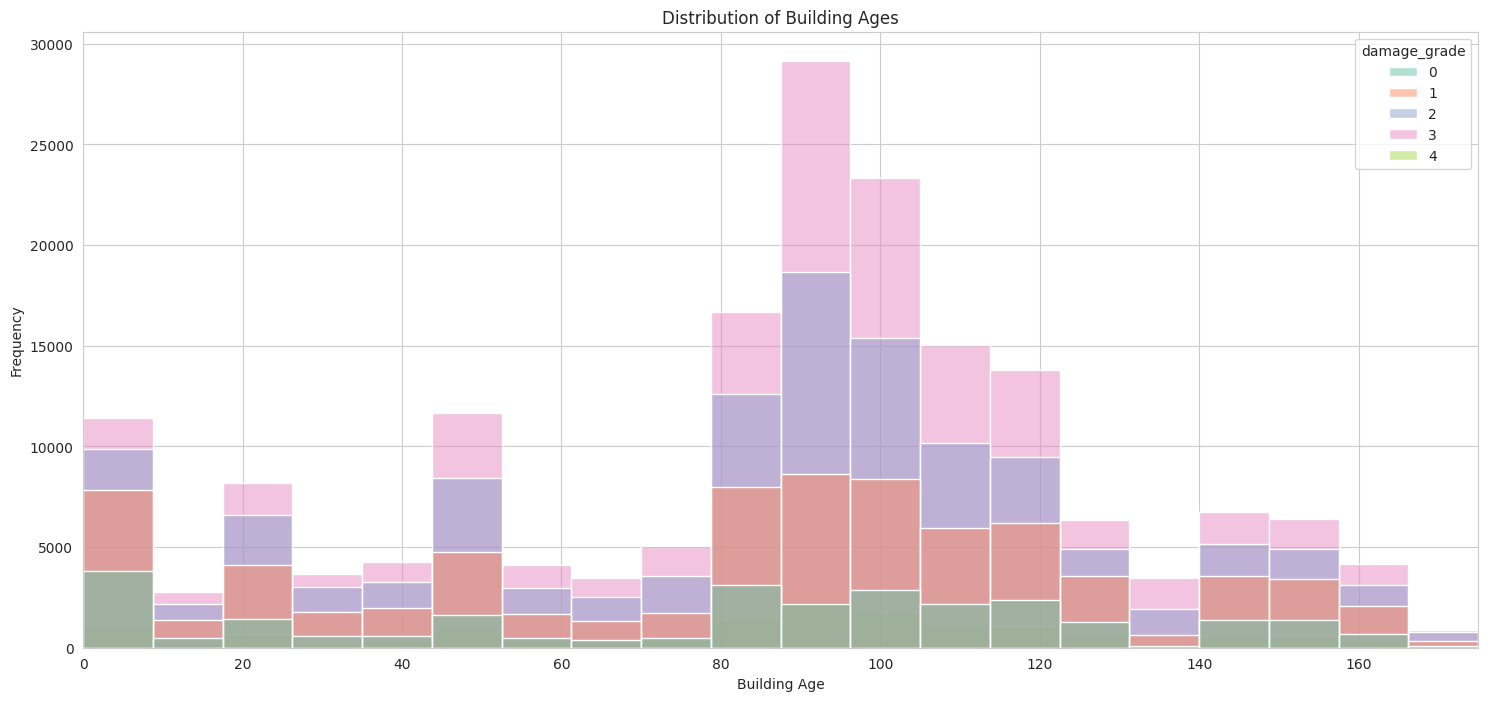

In [ ]:
min_age = df['age_building'].min()
max_age = df['age_building'].max()

plt.figure(figsize=(18, 8))
sns.histplot(data = df, x = 'age_building', bins=20, color='Teal', hue='damage_grade', palette='Set2')

plt.xlim(min_age, max_age)
plt.xlabel('Building Age')
plt.ylabel('Frequency')
plt.title('Distribution of Building Ages')


# Show the plot
plt.show()

Plot 2: roof_type

- Table used: Structure of buildings
- By: Navyadhara

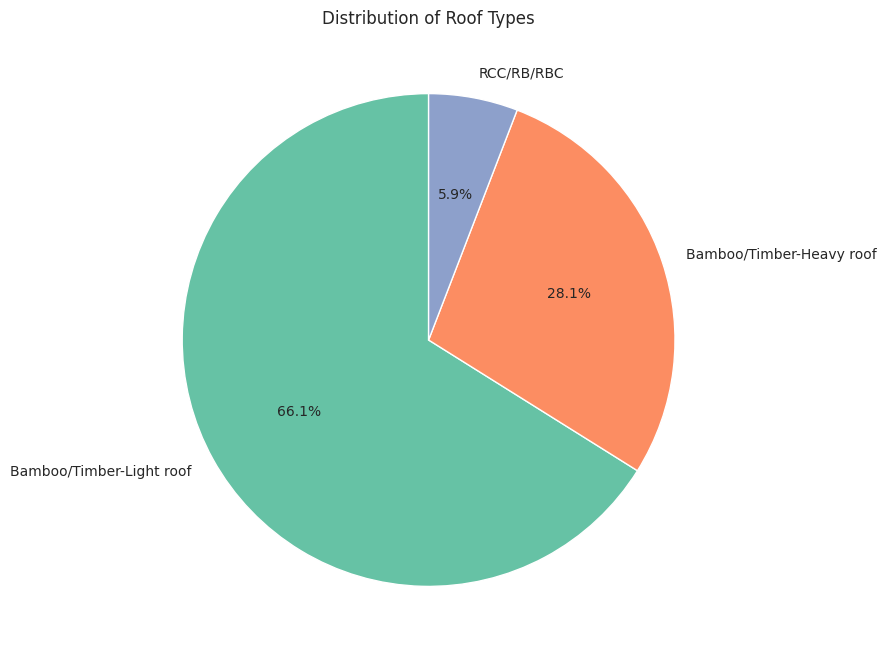

In [ ]:
roof_type_counts = df_structure['roof_type'].value_counts()
colors = sns.color_palette('Set2')


plt.figure(figsize=(8, 8))
plt.pie(roof_type_counts, labels=roof_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Roof Types')
# Show the plot
plt.show()


Plot 3: Countplot of damage grades
- By: Sandeep

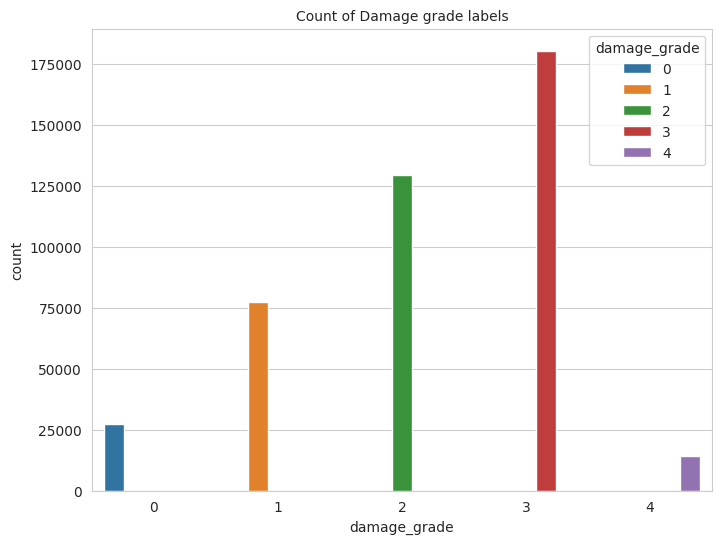

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Count of Damage grade labels', fontsize=10)
sns.countplot(x='damage_grade',data=df,hue='damage_grade')
plt.show()

Plot 4: Correlation heatmap
- By: Sandeep

<AxesSubplot: >

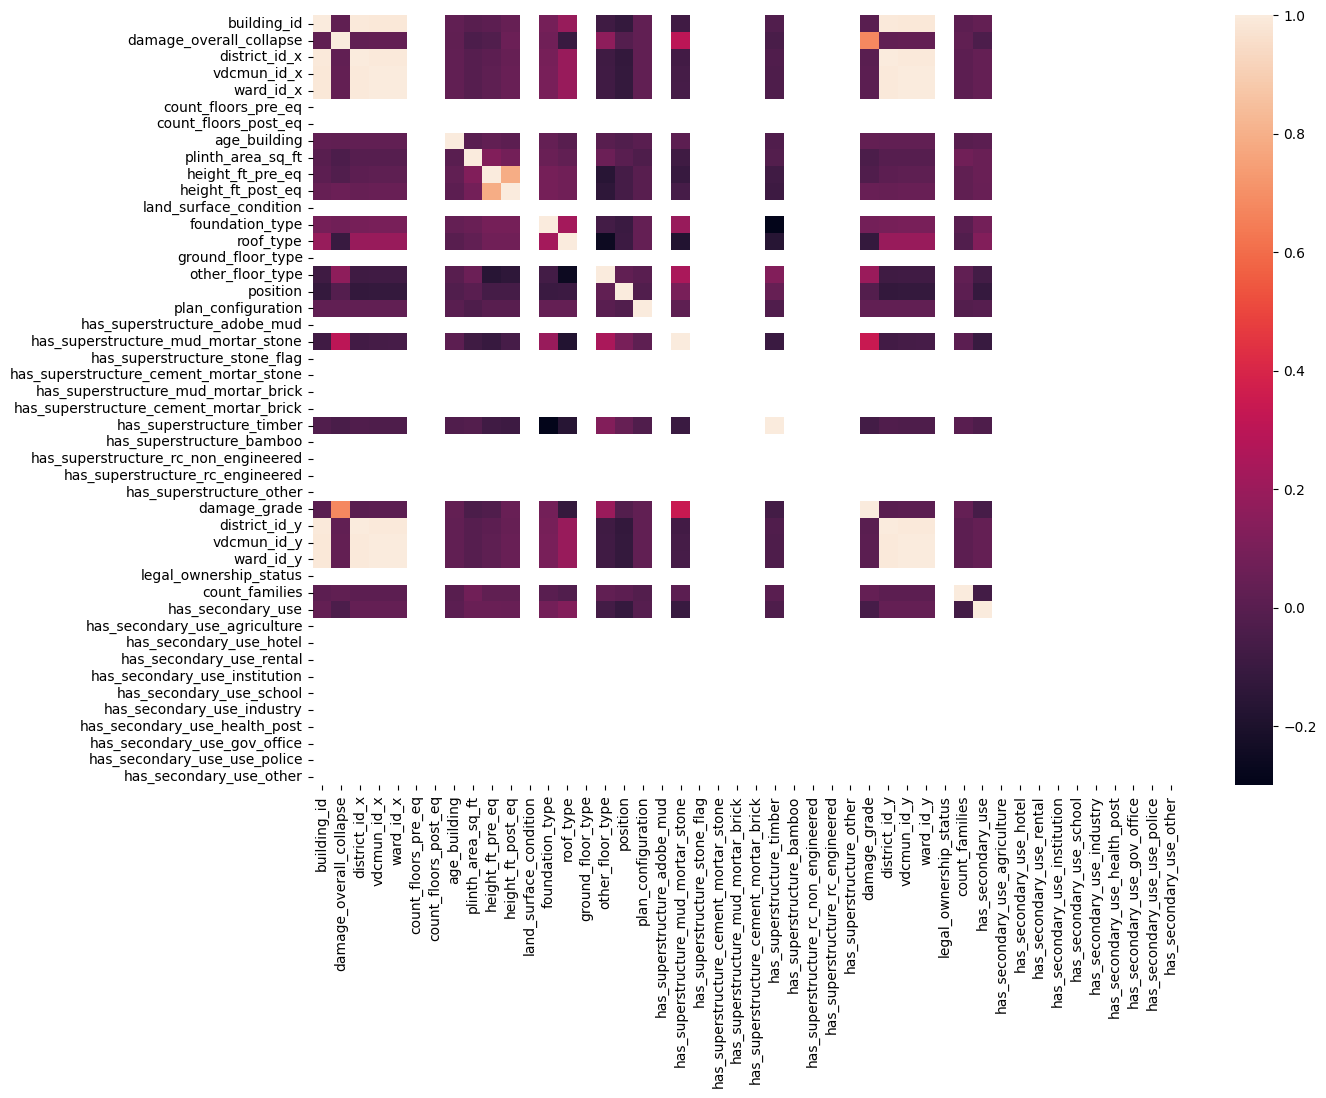

In [ ]:
f,ax = plt.subplots(figsize=(14,10))
corr = df.corr(method='spearman')
sns.heatmap(corr)

Plot: Features correlation to damage grade

- By: Navyadhara

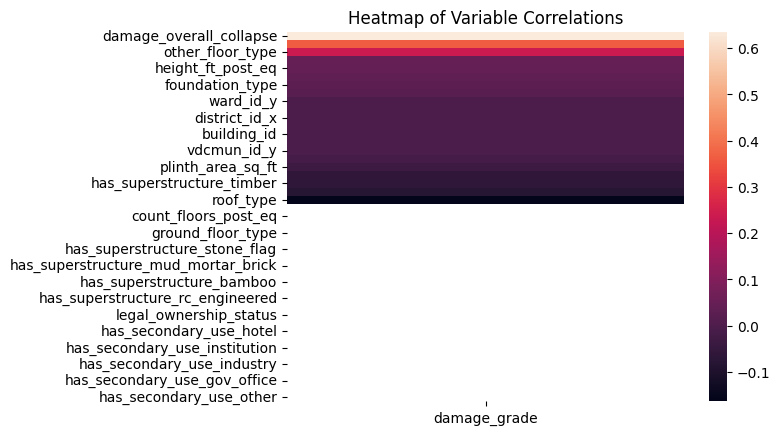

In [ ]:
correlation_matrix = df.corr()
def plotDeposit(data):
    correlation_column = pd.DataFrame(correlation_matrix['damage_grade'].drop('damage_grade'))
    correlation_column = correlation_column.sort_values(by='damage_grade', ascending=False)
    sns.heatmap(correlation_column)
    plt.title('Heatmap of Variable Correlations')
    
plotDeposit(df)

Plot: Violin Plot
- By: Navyadhara and Sandeep

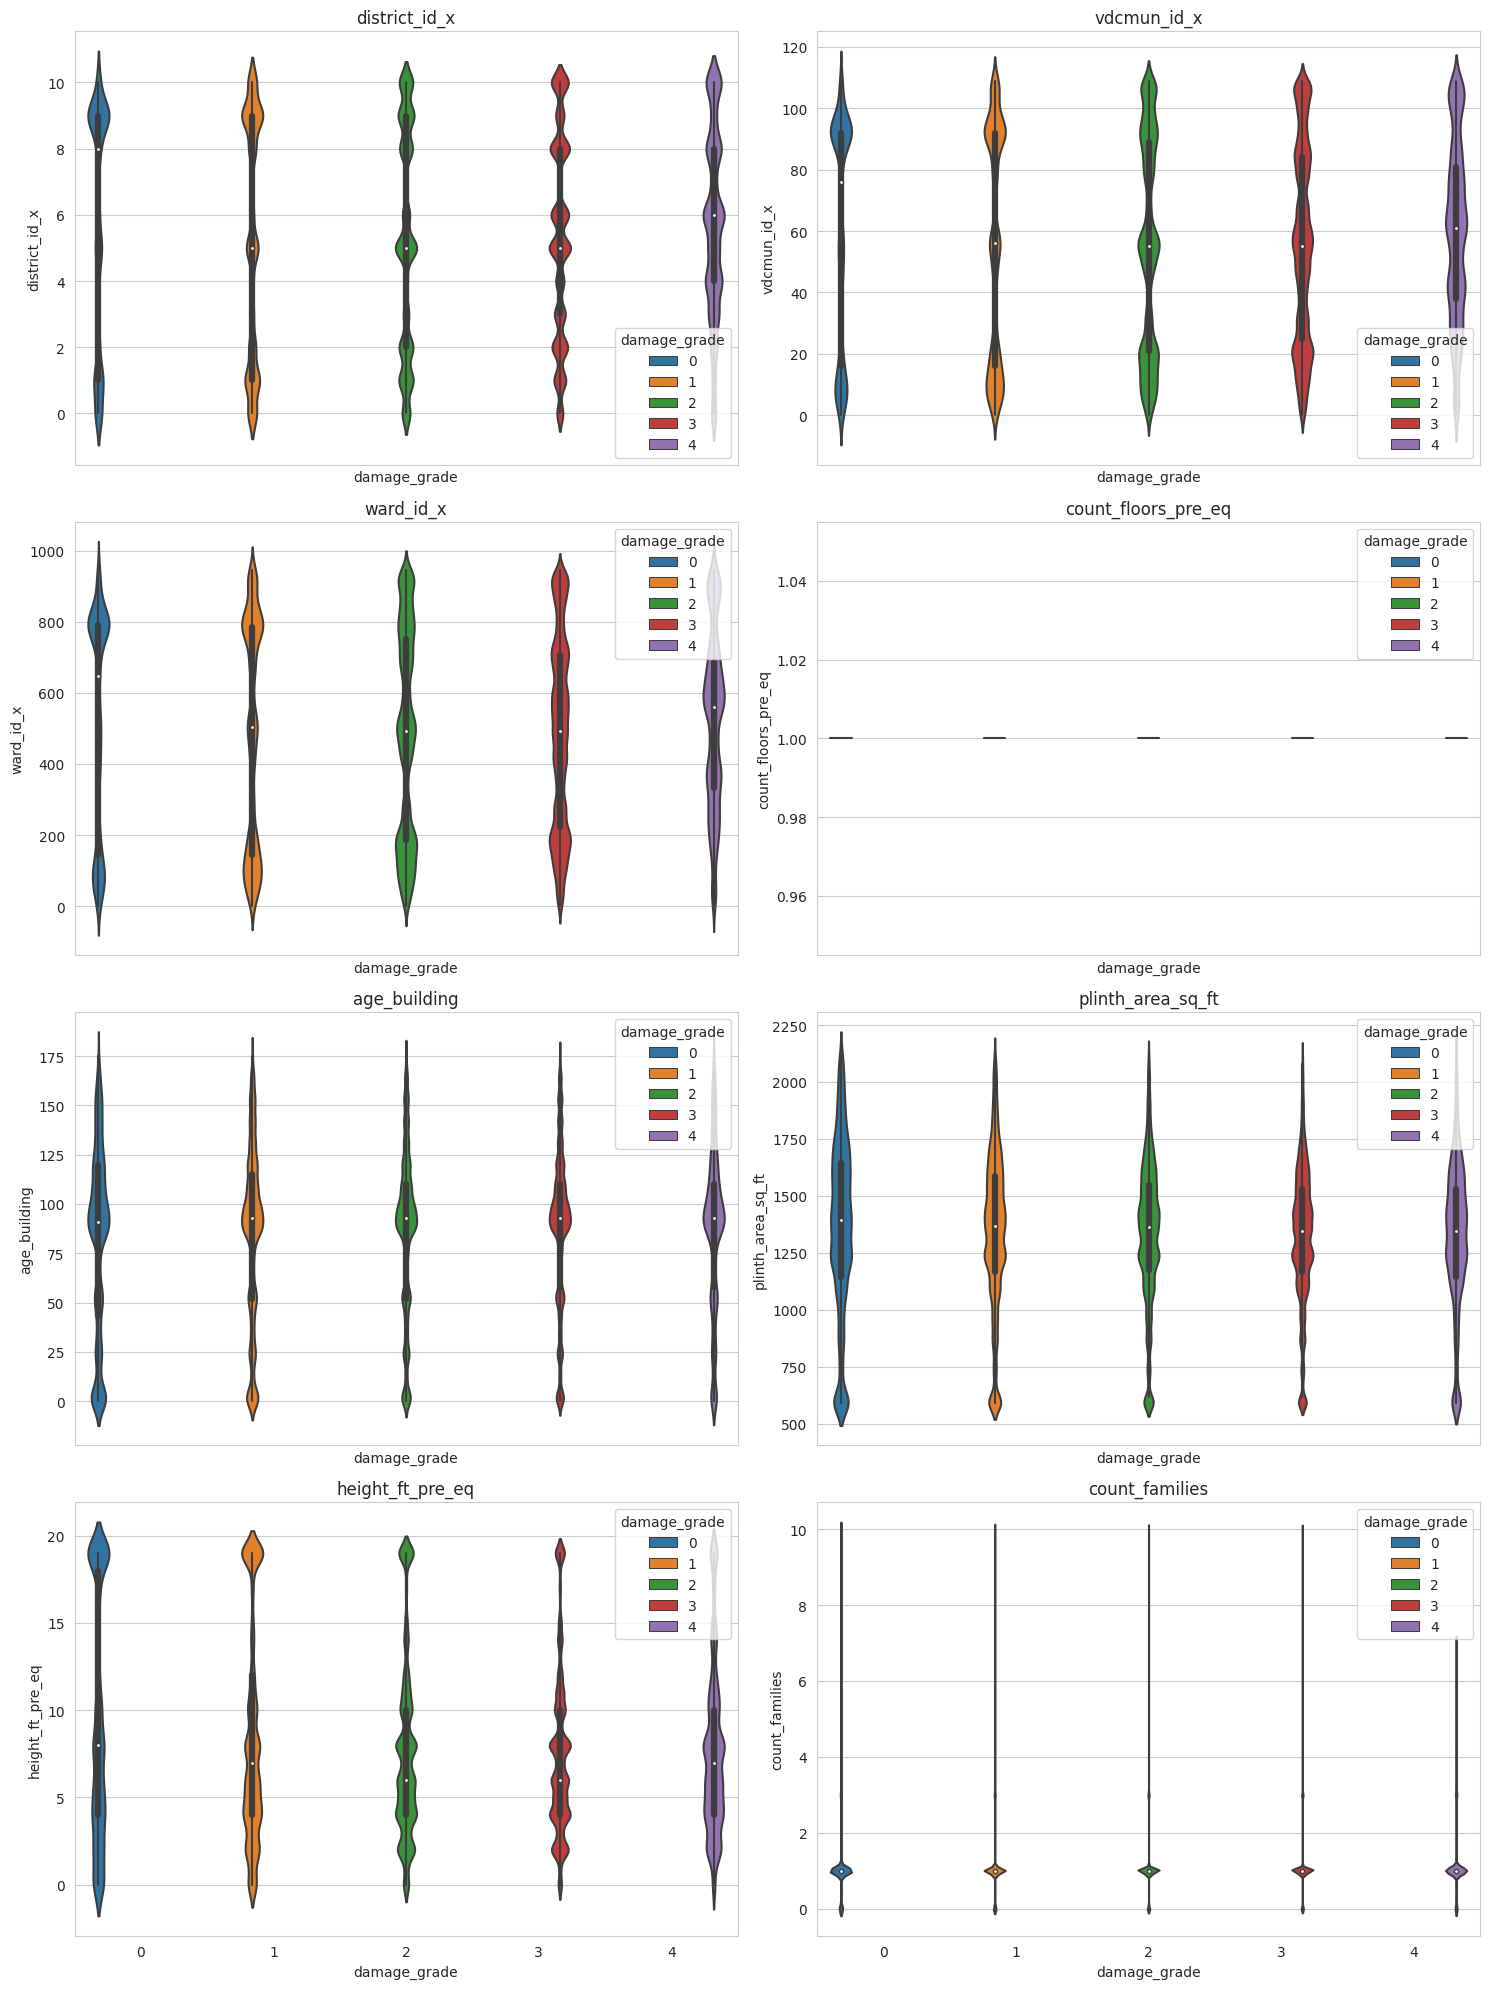

In [ ]:
cols = ['district_id_x', 'vdcmun_id_x', 'ward_id_x','count_floors_pre_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq','count_families']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=True)

for i, cols in enumerate(cols):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x='damage_grade', y=cols, hue='damage_grade', ax=axes[row, col])
    axes[row, col].set_title(cols)

plt.tight_layout()


Plot: Damage Analysis of properties built over mud

Hypothesis: The properties that are built over mud suffer higher damage

Result: As per the plot, the hypothesis is true.
- By: Navyadhara

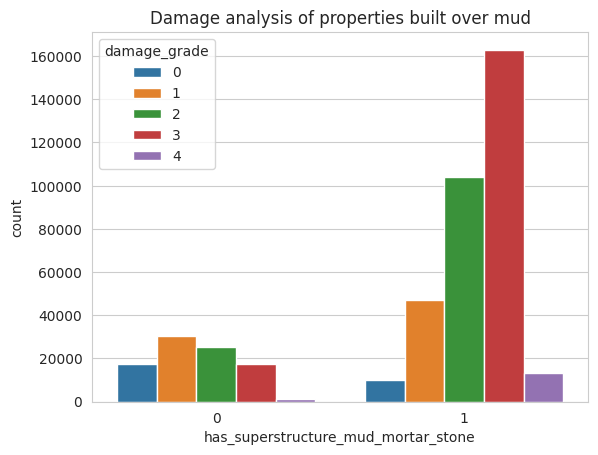

In [ ]:
plt.title('Damage analysis of properties built over mud')
sns.countplot(x='has_superstructure_mud_mortar_stone', data=df, hue='damage_grade');

Plot: Damage of properties less than 10 yrs old

- Hypothesis: Among the buildings less than 10 years, the older buildings have higher damage 
- By: Sandeep
- Result: False hypothesis

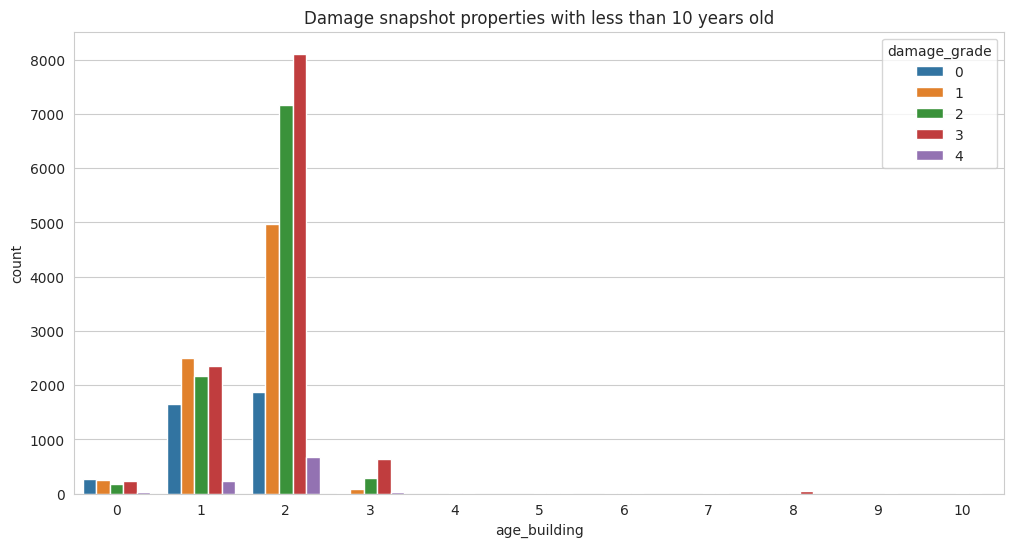

In [ ]:
plt.figure(figsize=(12,6))
# plt.subplot(211)
plt.title('Damage snapshot properties with less than 10 years old')
tr=df[df['age_building']<=10]
sns.countplot(x='age_building',data=tr,hue='damage_grade')

Plot: Number of buildings damaged in each district

- By: Sandeep

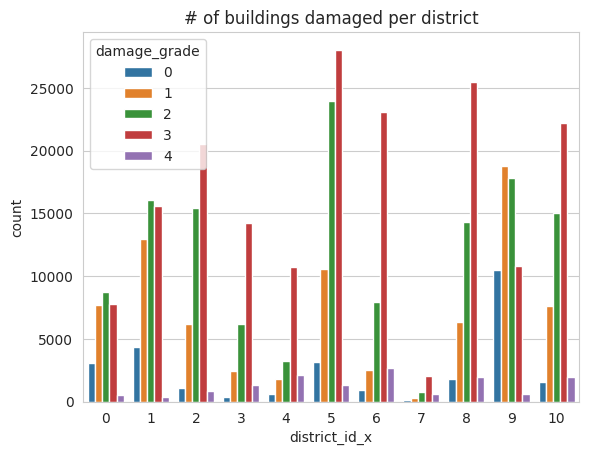

In [ ]:
sns.countplot(x='district_id_x',data=df,hue='damage_grade');
plt.title('# of buildings damaged per district');

# Model Planning

By Navyadhara: 
Hypothesis Question: Can we predict the level of damage caused by the 2015 Nepal earthquake to buildings based on their ownership, use, and structure characteristics?

Here are three ML models that I can use for this regression task, along with their pros and cons:



1.   Linear Regression:
Linear regression is a simple and interpretable ML model that can be used to predict the level of damage based on the input features. The pros of linear regression are that it is easy to interpret, computationally efficient, and provides a measure of feature importance. However, the cons are that it assumes a linear relationship between the input features and the target variable, which may not be true in all cases.
2.   Decision Tree Regression:
Decision tree regression is another ML model that can be used to predict the level of damage based on the input features. Decision trees are easy to interpret and can capture non-linear relationships between the input features and the target variable. The pros of decision trees are that they are interpretable, can handle non-linear relationships, and can handle missing data. However, the cons are that they can overfit the training data and may not generalize well to new data.
3. Random Forest Regression: Random forest regression is an ensemble learning method that combines multiple decision trees to make a prediction. It can improve the accuracy and generalization of the decision tree model by reducing overfitting. The pros of random forest are that it is more accurate than a single decision tree, can handle missing data, and can capture non-linear relationships. However, the cons are that it is more complex than a single decision tree and may require more computational resources.

In summary, linear regression is a simple and interpretable model, while decision tree regression can handle non-linear relationships and missing data, and random forest regression can improve accuracy and generalize well. The choice of model will depend on the specific characteristics of the data and the trade-offs between model simplicity and accuracy.

---

By Sandeep: 
Dwarampudi, Sandeep Reddy

Can we use the demographic characteristics of households in the areas affected by the 2015 Nepal earthquake to predict their vulnerability to the earthquake? 

    1. Boosting Models - (XGBoost)

    2. Bagging Models - (Random Forest)

    3. Tree based - (Descion Tree)

    4. Traditional Models - (Logisitc Classifier, K-NN, SVM)

    5. Stacking Classifier

We are using the following models as they can handle both categorical and numerical data and generate predictions

Boosting Models: 

- Pros = Can achieve high accuracy, theoretically reduces the risk of overfitting 

- Cons =  Computationally expensive especially for hyper-parameter tuning, sensitive to noisy data and are prone to bias

Bagging Models:

- Pros = Handles noisy data unlike boosting and reduces variance, increasinmg generalization
- Cons = Computationally expensive especially for hyper-parameter tuning, can increase bias

Tree based models - 

- Pros = Easily interpretable and robust to outliers
- Cons = They are overfiot and cause bias

Tradtional models -
- Pros = Simple and easy to implement and they have little to no-parameters, thereby reducing hyper-parameter tuning
- Cons = Computationally expensive when dealing with large datasets and with higher dimensional data

Stacking classifiers -

- Pros = Can increase the performance metrics by stacking the advantages of various models
- Cons = Computationally very expensive as we may have to deal with many base classifiers and extermely difficult to interpret




# Reflection




*   So far everything has been smooth and we have not faced many issues. 
*   We have finished most part of our EDA we initially thought of producing, and we feel we have a concrete result in the form of how much EDA we have done.

*   We honesltly think everything has been on track with out expectations and timeline of project.
*   After performing adequate analysis on data, we strongly feel it is fully worth proceeding with our project because we are able to collect all the features necessary to test our hypothesis questions.







## ML Implementation and Results - Sandeep 

I have taken the available demographic columns

In [ ]:
demographics_df = df[['ward_id_x', 'vdcmun_id_x', 'district_id_x', 'damage_grade_x']] 


<AxesSubplot: >

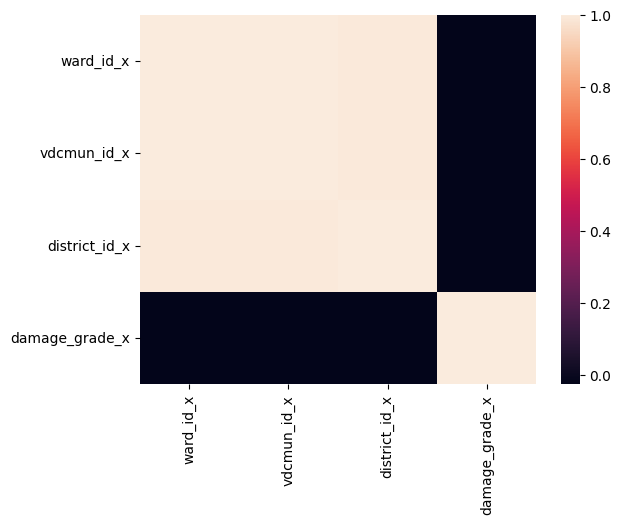

In [ ]:
corr = demographics_df.corr(method='spearman')
sns.heatmap(corr)

In [ ]:
X = demographics_df.drop(['damage_grade_x'], axis=1)
y = df['damage_grade_x'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    print("Test accuracy:", accuracy_score(y_test, y_pred_test))
    print('Train accuracy:', accuracy_score(y_train, y_pred_train))

    if str(clf) == 'LogisticRegression()':
        importance = clf.coef_[0]
    elif str(type(clf).__name__) in ['DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']:
        importance = clf.feature_importances_
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        plt.style.use('seaborn-darkgrid')
        plt.figure(figsize=(8, 5))
        plt.bar([x for x in range(len(importance))], importance, color='orange')
        plt.title(f"Feature Importance for {str(type(clf).__name__)}")
        plt.xlabel("Feature Index")
        plt.ylabel("Feature Importance Score")
        plt.show()

    cm = confusion_matrix(y_test, y_pred_test)
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3', 'Predicted:4', 'Predicted:5'],
                               index=['Actual:1', 'Actual:2', 'Actual:3', 'Actual:4', 'Actual:5'])
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {str(type(clf).__name__)}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=360)
    plt.show()
    
    print(f"Classification report for {str(type(clf).__name__)}:\n\n",classification_report(y_test, y_pred_test))

Test accuracy: 0.3613560496315425
Train accuracy: 0.36120573369094544


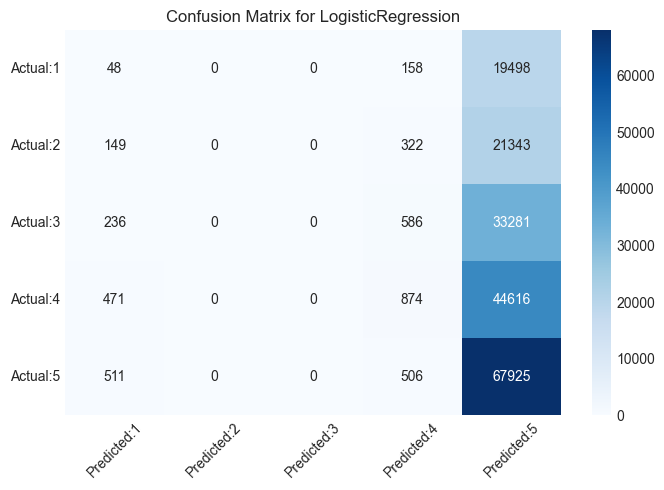

Classification report for LogisticRegression:

               precision    recall  f1-score   support

           0       0.03      0.00      0.00     19704
           1       0.00      0.00      0.00     21814
           2       0.00      0.00      0.00     34103
           3       0.36      0.02      0.04     45961
           4       0.36      0.99      0.53     68942

    accuracy                           0.36    190524
   macro avg       0.15      0.20      0.11    190524
weighted avg       0.22      0.36      0.20    190524

Test accuracy: 0.5266108206840083
Train accuracy: 0.5278627777223748
Feature: 0, Score: 0.56663
Feature: 1, Score: 0.15499
Feature: 2, Score: 0.27838


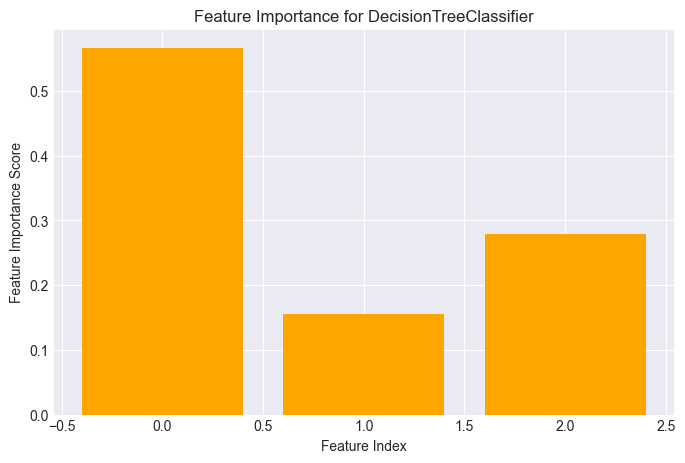

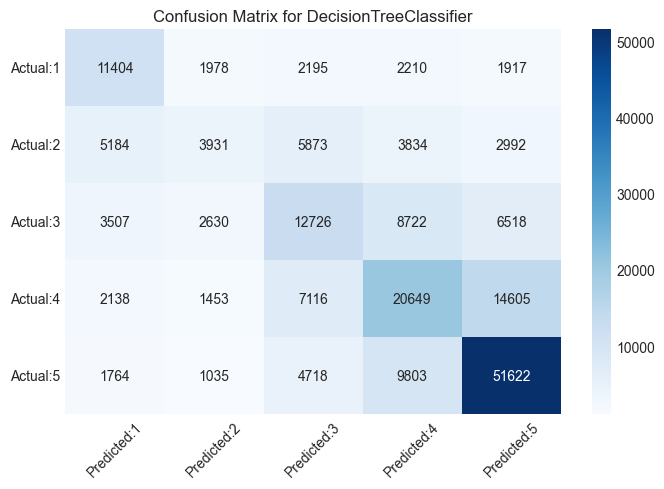

Classification report for DecisionTreeClassifier:

               precision    recall  f1-score   support

           0       0.48      0.58      0.52     19704
           1       0.36      0.18      0.24     21814
           2       0.39      0.37      0.38     34103
           3       0.46      0.45      0.45     45961
           4       0.66      0.75      0.70     68942

    accuracy                           0.53    190524
   macro avg       0.47      0.47      0.46    190524
weighted avg       0.51      0.53      0.51    190524

Test accuracy: 0.5262434129033613
Train accuracy: 0.5278487811620294
Feature: 0, Score: 0.54301
Feature: 1, Score: 0.27983
Feature: 2, Score: 0.17716


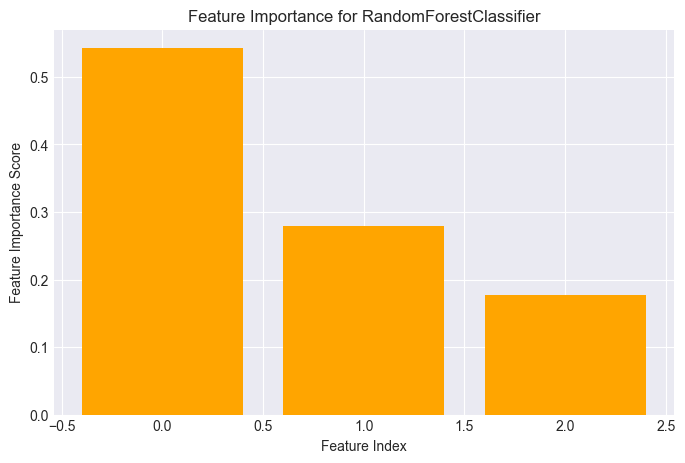

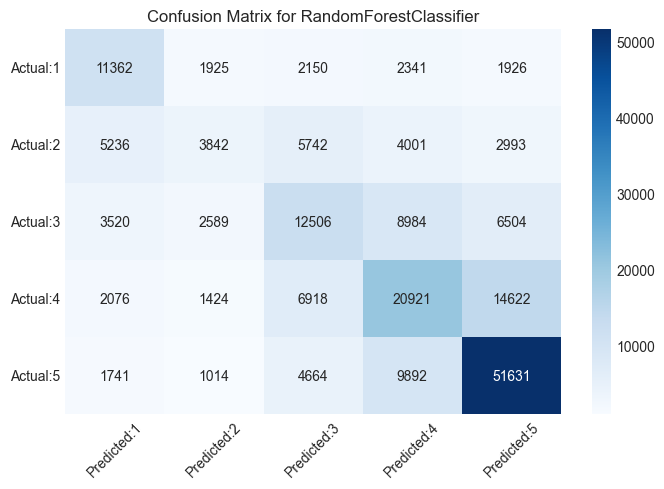

Classification report for RandomForestClassifier:

               precision    recall  f1-score   support

           0       0.47      0.58      0.52     19704
           1       0.36      0.18      0.24     21814
           2       0.39      0.37      0.38     34103
           3       0.45      0.46      0.45     45961
           4       0.66      0.75      0.70     68942

    accuracy                           0.53    190524
   macro avg       0.47      0.46      0.46    190524
weighted avg       0.51      0.53      0.51    190524

Test accuracy: 0.522627070605278
Train accuracy: 0.5244231230175185
Feature: 0, Score: 1.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000


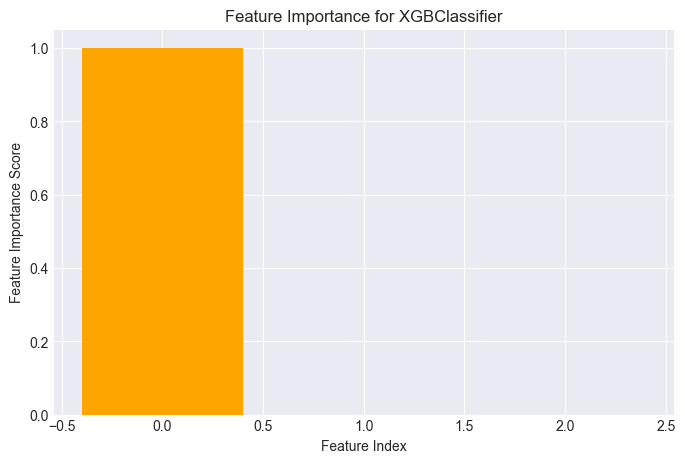

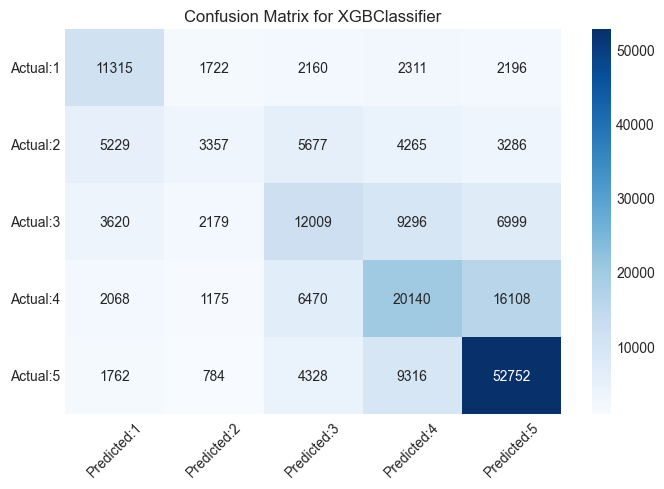

Classification report for XGBClassifier:

               precision    recall  f1-score   support

           0       0.47      0.57      0.52     19704
           1       0.36      0.15      0.22     21814
           2       0.39      0.35      0.37     34103
           3       0.44      0.44      0.44     45961
           4       0.65      0.77      0.70     68942

    accuracy                           0.52    190524
   macro avg       0.46      0.46      0.45    190524
weighted avg       0.50      0.52      0.51    190524

Test accuracy: 0.5266213180491697
Train accuracy: 0.5278522803021157


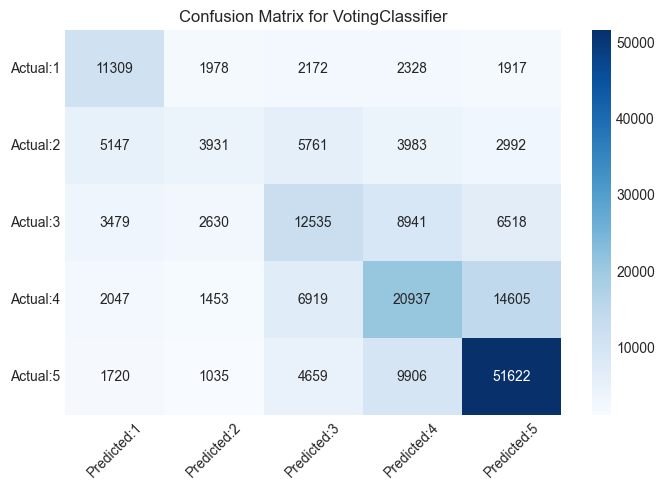

Classification report for VotingClassifier:

               precision    recall  f1-score   support

           0       0.48      0.57      0.52     19704
           1       0.36      0.18      0.24     21814
           2       0.39      0.37      0.38     34103
           3       0.45      0.46      0.45     45961
           4       0.66      0.75      0.70     68942

    accuracy                           0.53    190524
   macro avg       0.47      0.47      0.46    190524
weighted avg       0.51      0.53      0.51    190524



In [ ]:
for clf in [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('xgb', XGBClassifier()), ('dt', DecisionTreeClassifier())], voting='hard')]:
    evaluate_classifier(clf, X_train, y_train, X_test, y_test)

## Conclusion

ward_id is the most important demographic feature for estimating the damage. I selected the voting classifier as it has the best F1-score and the higheest rtest accuracy

# ML Implementations - Navyadhara

Can we predict/expect the level/amount of damage caused by the 2015 Nepal earthquake to buildings based on their ownership, use, and structure characteristics? 

From the `csv_building_structure` dataset:
- `count_floors_pre_eq`: Number of floors before the earthquake
- `age_building`: Age of the building
- `plinth_area_sq_ft`: Plinth area of the building in square feet
- `height_ft_pre_eq`: Height of the building before the earthquake
- `land_surface_condition`: Surface condition of the land where the building is situated
- `foundation_type`: Type of foundation used in the building
- `roof_type`: Type of roof used in the building
- `ground_floor_type`: Type of ground floor used in the building
- `other_floor_type`: Type of other floors used in the building
- `position`: Position of the building
- `plan_configuration`: Plan configuration of the building

From the `csv_building_ownership_and_use` dataset:
- `ownership_status`: Ownership status of the building (e.g., private, public, institutional, etc.)
- `count_families`: Number of families living in the building
- `has_secondary_use`: Whether the building has a secondary use

I have considered the correlation analysis we have done to come up with these features

In [ ]:
def Predict(x, original):
  import math
  c = 0
  p = math.floor(x[0])
  if p == original:
    print("Predicted the damage grade accuractely")
  else:
    print("Predicted the damage grade inaccuractely")
  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
selected_features = [
    'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
    'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
    'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status',
    'count_families', 'has_secondary_use'
]

In [ ]:
X = df[selected_features]
y = df['damage_overall_collapse']

Divide into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear Regression Model

In [ ]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred_lin_reg = lin_reg.predict(X_test)
print('Mean Squared Error of Linear Regression', mean_squared_error(y_test, y_pred_lin_reg))
print('R2 Score of Linear Regression:', r2_score(y_test, y_pred_lin_reg))


Mean Squared Error of Linear Regression 1.194455294258308
R2 Score of Linear Regression: 0.643513901566637


Decision Tree Model

In [ ]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_dtree_reg = dtree_reg.predict(X_test)
print('Mean Squared Error of Decision Tree Regressor:', mean_squared_error(y_test, y_pred_dtree_reg))
print('R2 Score of Decision Tree Regressor:', r2_score(y_test, y_pred_dtree_reg))

Mean Squared Error of Decision Tree Regressor: 1.9655736556026955
R2 Score of Decision Tree Regressor: 0.7035478190922297


Lets visualise the tree

In [ ]:

from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree_reg, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Damage'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


Random Forest Model

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf_reg = rf_reg.predict(X_test)
print('Mean Squared Error of Random Forest Regression:', mean_squared_error(y_test, y_pred_rf_reg))
print('R2 Score of Random Forest Regression:', r2_score(y_test, y_pred_rf_reg))

Mean Squared Error of Random Forest Regression: 1.2803422215247648
R2 Score of Random Forest Regression: 0.6655106602455968


We can see that, of the three models, random forest is the best by considereing both MSE and r2_score 

Random test cases

In [ ]:
test_sample_1_encoded = pd.DataFrame({
    'count_floors_pre_eq': [2],
    'age_building': [40],
    'plinth_area_sq_ft': [1323],
    'height_ft_pre_eq': [20],
    'land_surface_condition': [0],  # Assuming 'Flat' is encoded as 0
    'foundation_type': [3],  # Assuming 'Mud mortar-Stone/Brick' is encoded as 3
    'roof_type': [1],  # Assuming 'Bamboo/Timber-Light roof' is encoded as 1
    'ground_floor_type': [2],  # Assuming 'M encoded as 2
    'other_floor_type': [3],  # Assuming 'Not applicable' is encoded as 3
    'position': [3],  # Assuming 'Not attached' is encoded as 3
    'plan_configuration': [6],  # Assuming 'Rectangular' is encoded as 6
    'legal_ownership_status': [2],  # Assuming 'Private' is encoded as 2
    'count_families': [1],
    'has_secondary_use': [0] # Assuming 'None' is encoded as 0
})
test_sample_1_encoded_original = 1

In [ ]:
prediction_1_encoded = Predict(rf_reg.predict(test_sample_1_encoded), test_sample_1_encoded_original)

Predicted the damage grade accuractely


In [ ]:
test_sample_2_encoded = pd.DataFrame({
    'count_floors_pre_eq': [5],
    'age_building': [100],
    'plinth_area_sq_ft': [322],
    'height_ft_pre_eq': [50],
    'land_surface_condition': [1],  # Assuming 'Flat' is encoded as 0
    'foundation_type': [1],  # Assuming 'Mud mortar-Stone/Brick' is encoded as 3
    'roof_type': [2],  # Assuming 'Bamboo/Timber-Light roof' is encoded as 1
    'ground_floor_type': [2],  # Assuming 'M encoded as 2
    'other_floor_type': [3],  # Assuming 'Not applicable' is encoded as 3
    'position': [3],  # Assuming 'Not attached' is encoded as 3
    'plan_configuration': [6],  # Assuming 'Rectangular' is encoded as 6
    'legal_ownership_status': [2],  # Assuming 'Private' is encoded as 2
    'count_families': [1],
    'has_secondary_use': [0] # Assuming 'None' is encoded as 0
})

test_sample_2_encoded_original = 1

In [ ]:
prediction_2_encoded = Predict(dtree_reg.predict(test_sample_2_encoded), test_sample_2_encoded_original)

Predicted the damage grade accuractely


Now lets predict expect the accuracies for each model. Note that since this is not an classification, we can just try to expect the accuracies and not have classification report or confusion matrix

In [ ]:
c=0
for i in range(1,60):
  # print(dtree_reg.predict(pd.DataFrame(df.iloc[i][selected_features]).transpose()),int(df.iloc[i]['damage_overall_collapse']) )
  a =   Predict(dtree_reg.predict(pd.DataFrame(df.iloc[i][selected_features]).transpose()), int(df.iloc[i]['damage_overall_collapse']))
  c = c+ a 
print("Accuracy in expecting the damage grade for this model:", (c/60)*100)


Accuracy in expecting the damage grade for this model: 85.41666666666666


In [ ]:
c=0
for i in range(1,60):
  # print(dtree_reg.predict(pd.DataFrame(df.iloc[i][selected_features]).transpose()),int(df.iloc[i]['damage_overall_collapse']) )
  a =   Predict(lin_reg.predict(pd.DataFrame(df.iloc[i][selected_features]).transpose()), int(df.iloc[i]['damage_overall_collapse']))
  c = c+ a 
print("Accuracy in expecting the damage grade for this model:", (c/60)*100)


Accuracy in expecting the damage grade for this model: 60.416666666666664


In [ ]:
c=0
for i in range(1,60):
  # print(dtree_reg.predict(pd.DataFrame(df.iloc[i][selected_features]).transpose()),int(df.iloc[i]['damage_overall_collapse']) )
  a =   Predict(rf_reg.predict(pd.DataFrame(df.iloc[i][selected_features]).transpose()), int(df.iloc[i]['damage_overall_collapse']))
  c = c+ a 
print("Accuracy in expecting the damage grade for this model:", (c/60)*100)


Accuracy in expecting the damage grade for this model: 83.33333333333334


Also from the results, floor_type, age, sqft are some of the most effecting variables for the damage

# References: 

1. Scikit-learn. (n.d.). Scikit-learn: Machine learning in Python. Retrieved March 30, 2023, from https://scikit-learn.org/stable/

2. Pandas. (n.d.). Pandas documentation. Retrieved March 30, 2023, from https://pandas.pydata.org/docs/

3. Matplotlib. (n.d.). Matplotlib: Visualization with Python. Retrieved March 30, 2023, from https://matplotlib.org/stable/index.html

4. Seaborn. (n.d.). Seaborn: Statistical data visualization. Retrieved March 30, 2023, from https://seaborn.pydata.org/

5. National Planning Commission. (n.d.). Nepal earthquake 2015 open data portal. Retrieved March 30, 2023, from https://eq2015.npc.gov.np/#/

6. SciPy. (n.d.). SciPy: Scientific library for Python. Retrieved March 30, 2023, from https://docs.scipy.org/doc/scipy/